### Problem Statement: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


## Checking For Nan and Duplicated Values

In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.duplicated().sum()

8

In [7]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
columns= df.columns

for col in df[columns]:
    print()
    print(col)
    print(df[col].value_counts())


month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

FFMC
92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

DMC
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

DC
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

ISI
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

temp
17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
      

## Target Column

In [9]:
df['area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [10]:
df['area'].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

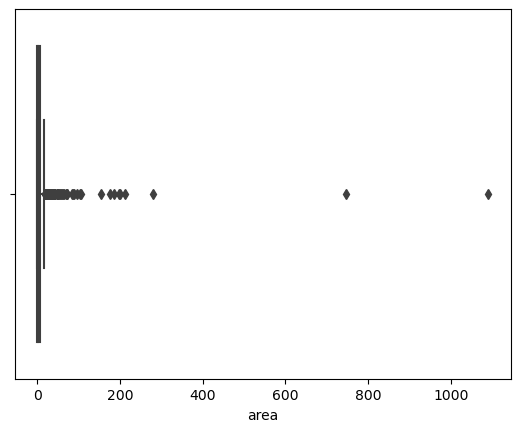

In [11]:
sns.boxplot(x=df['area']);

## Removing Extreme Outlier`

In [12]:
index=df[df['area']>200].index
index
df.drop(index,axis=0,inplace=True)

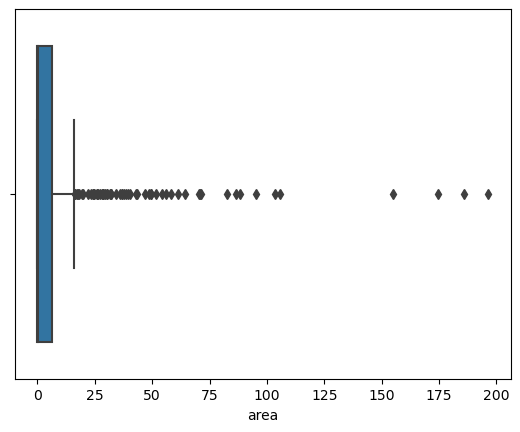

In [13]:
sns.boxplot(x=df['area']);

In [14]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

## Dropping columns

In [15]:
df.drop(['month', 'day'],axis=1,inplace=True)

In [16]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


## Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

df["size_category"]=le.fit_transform(df["size_category"])

In [19]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


## Correlation

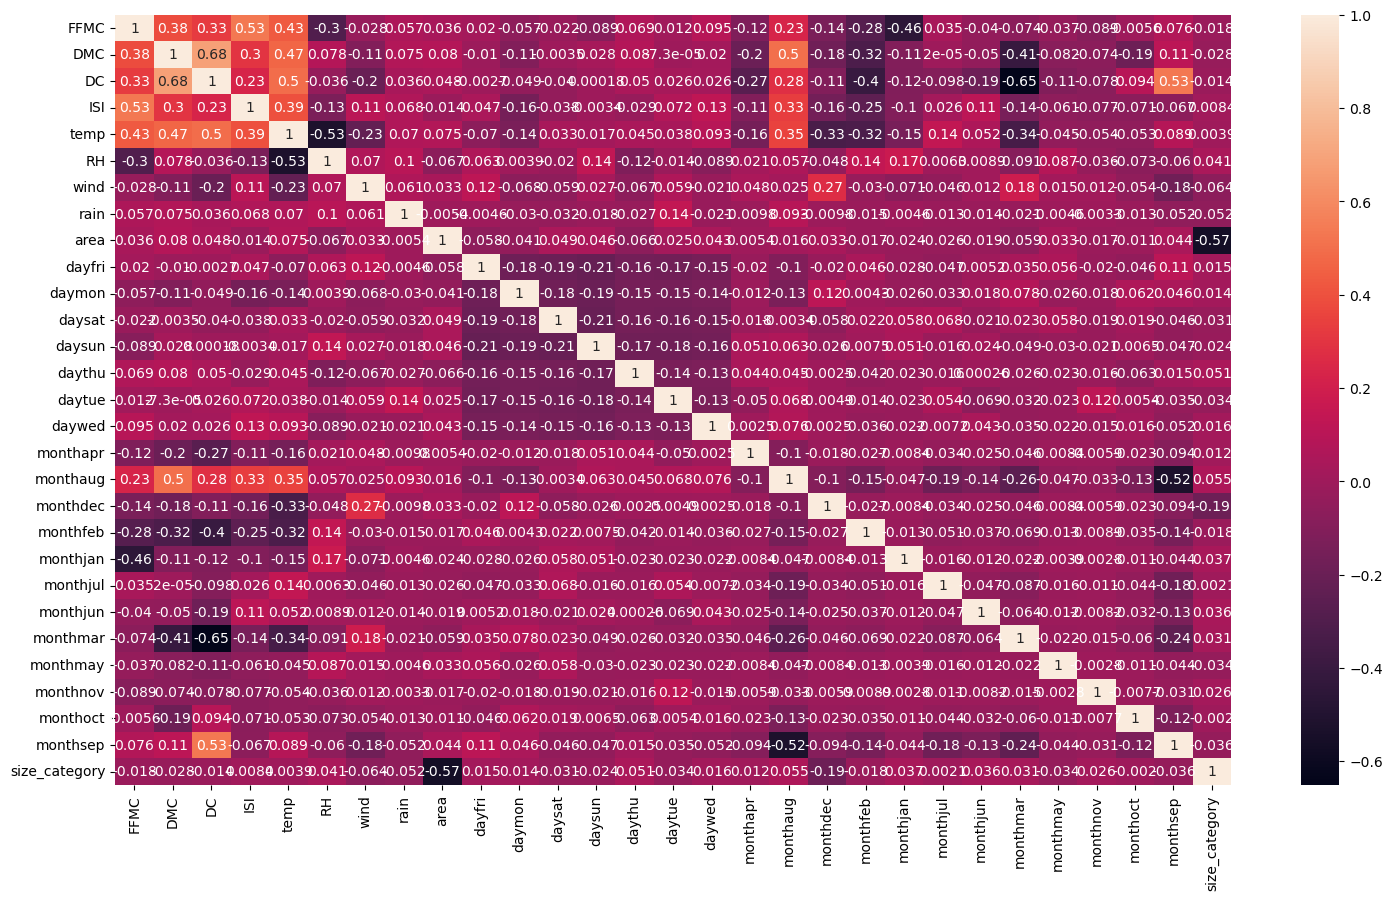

In [20]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True);

[]

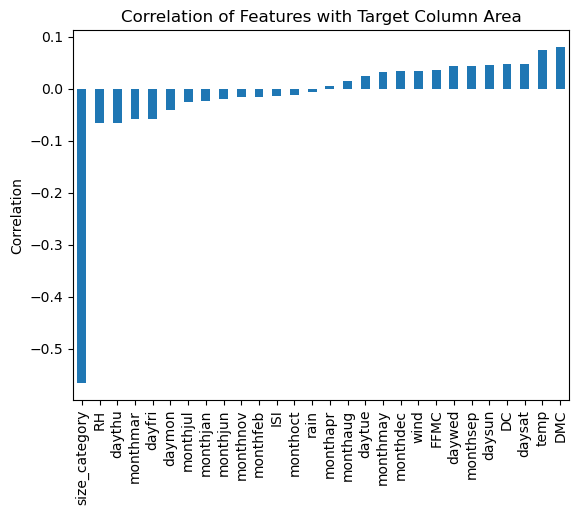

In [21]:
df.corr()["area"].sort_values()[:-1].plot(kind='bar')
plt.title('Correlation of Features with Target Column Area')
plt.ylabel("Correlation")
plt.plot()

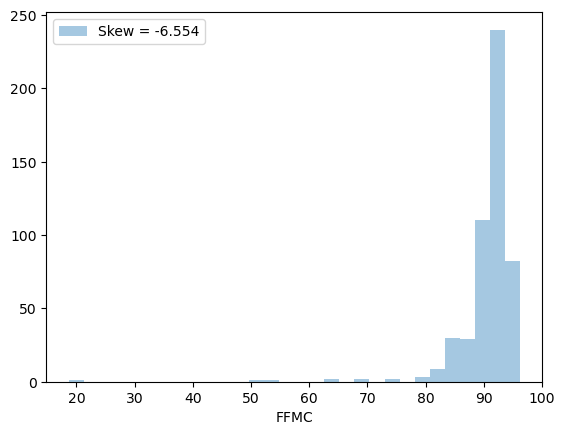

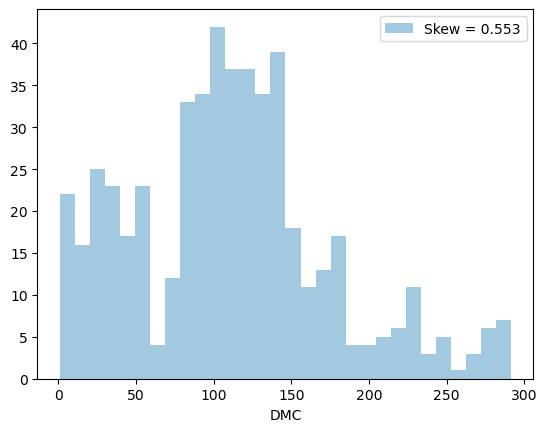

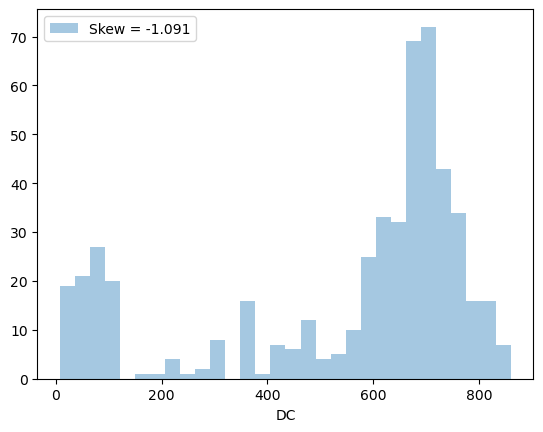

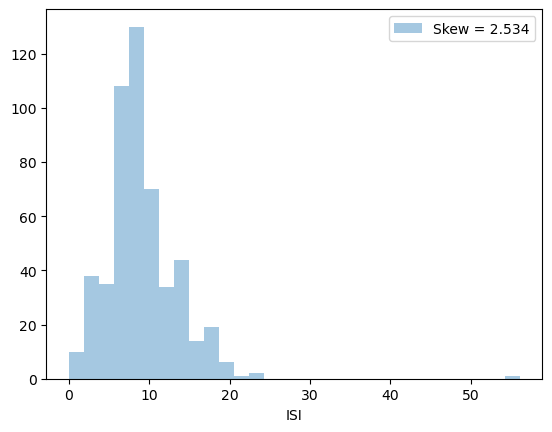

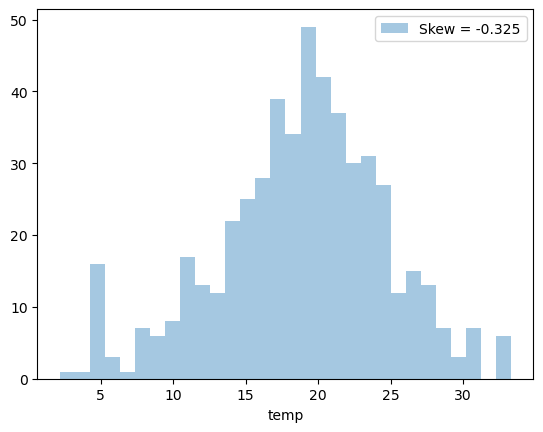

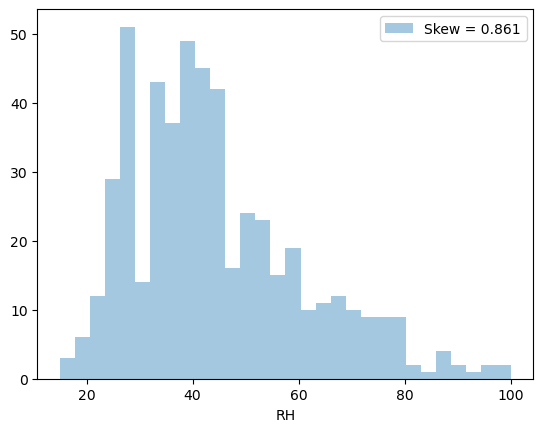

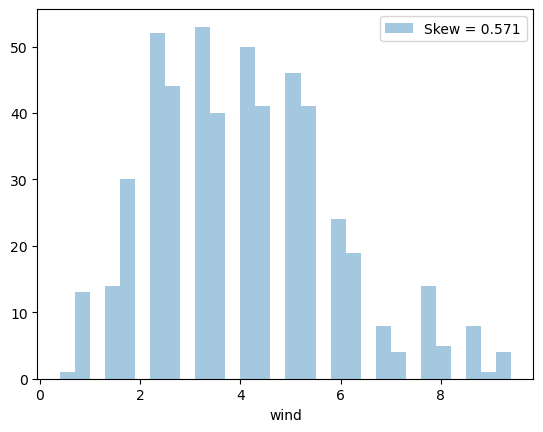

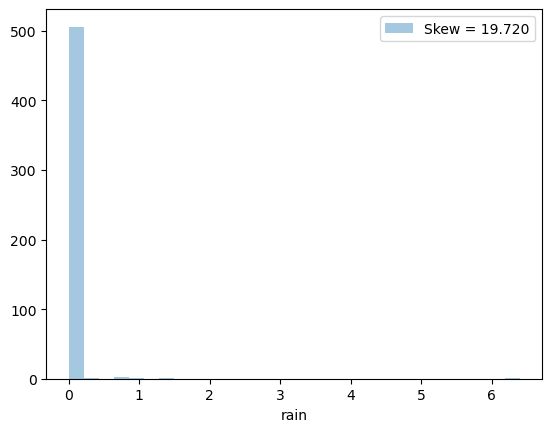

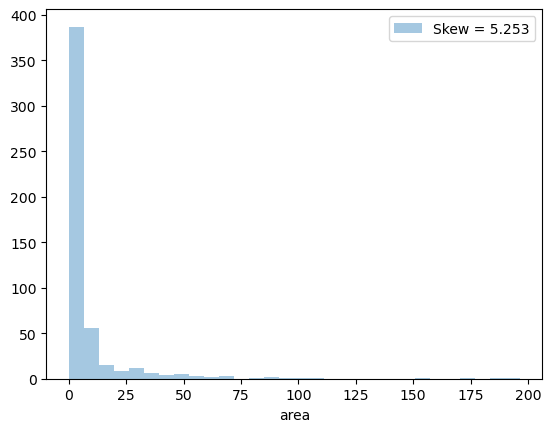

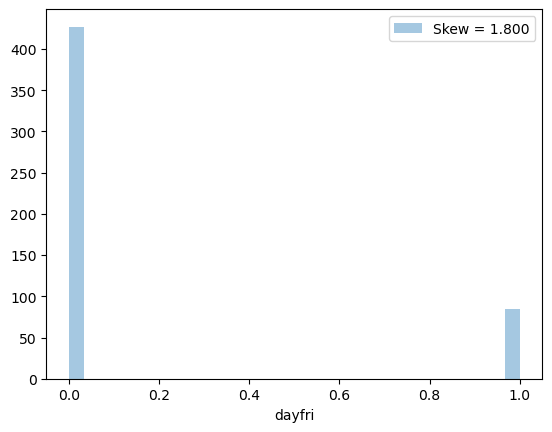

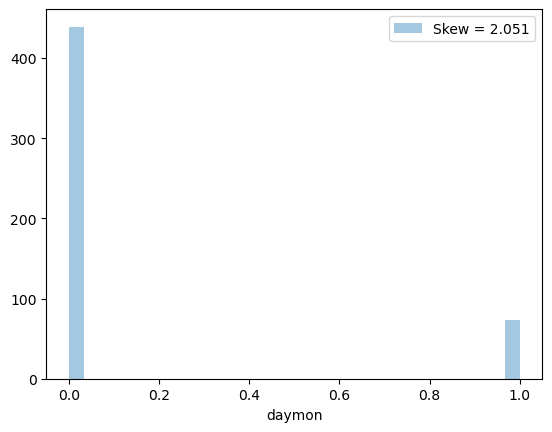

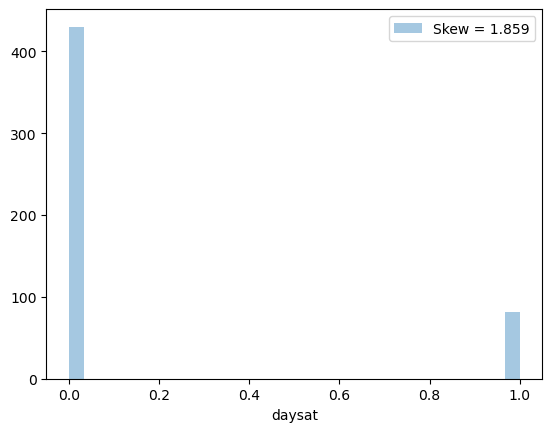

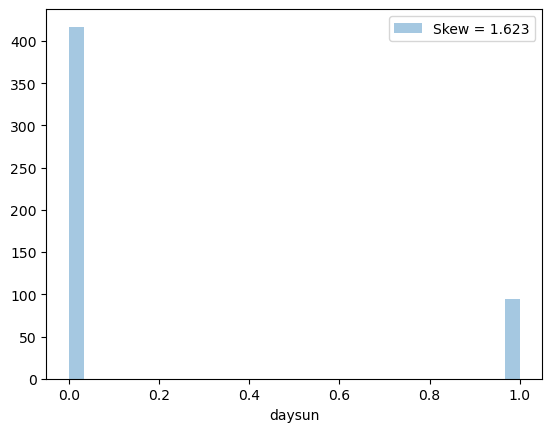

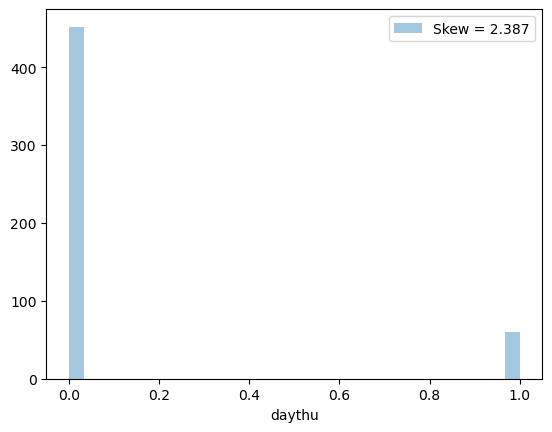

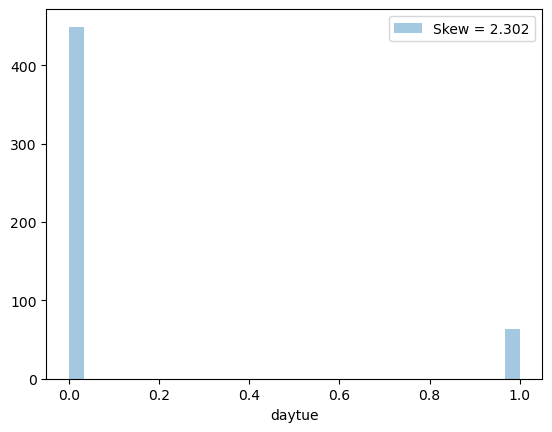

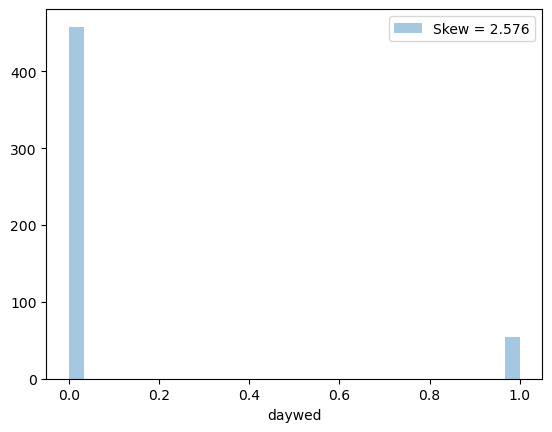

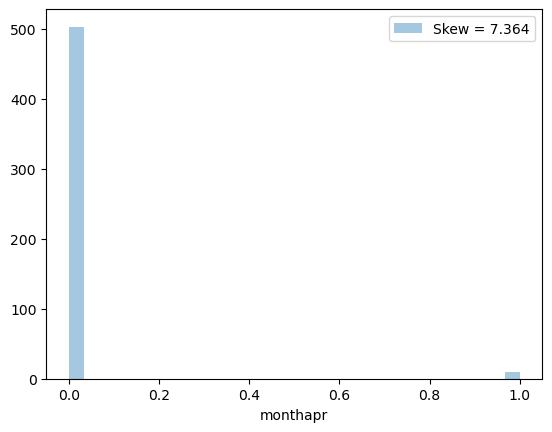

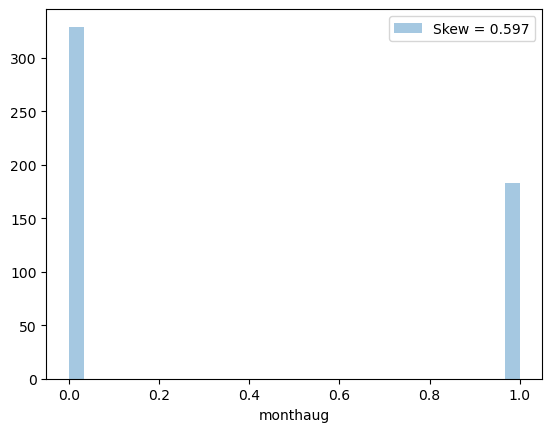

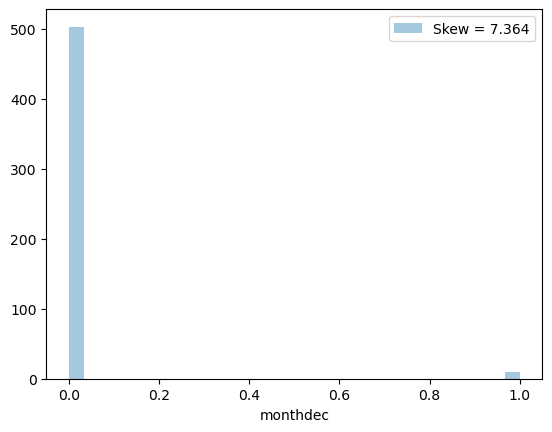

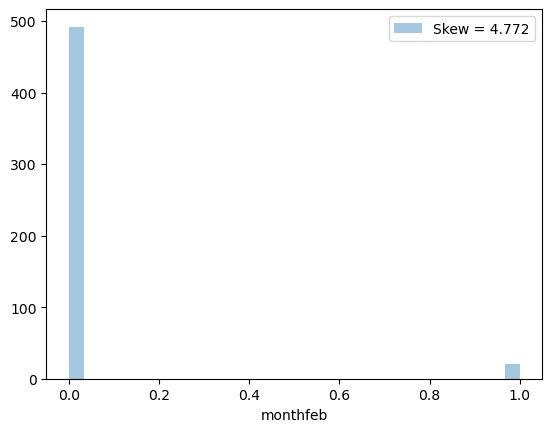

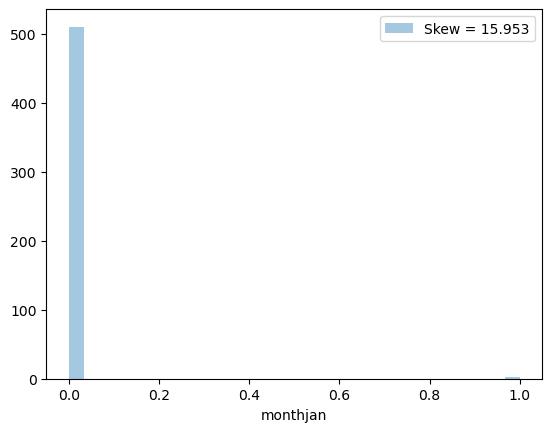

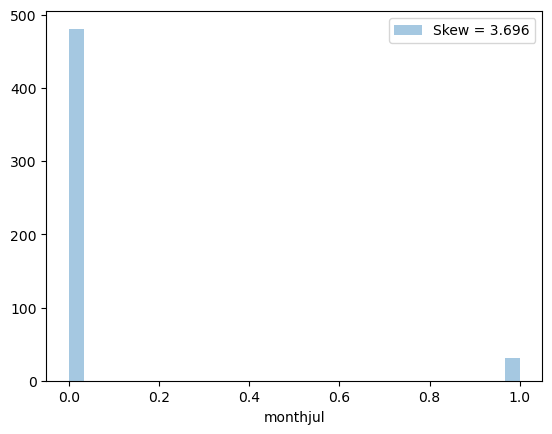

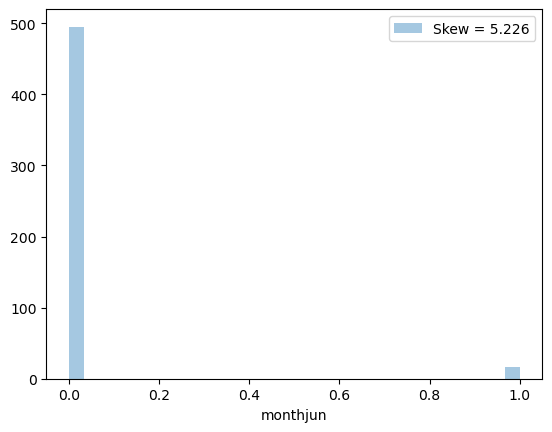

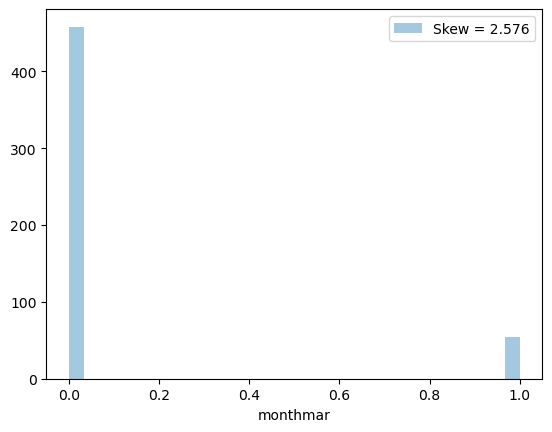

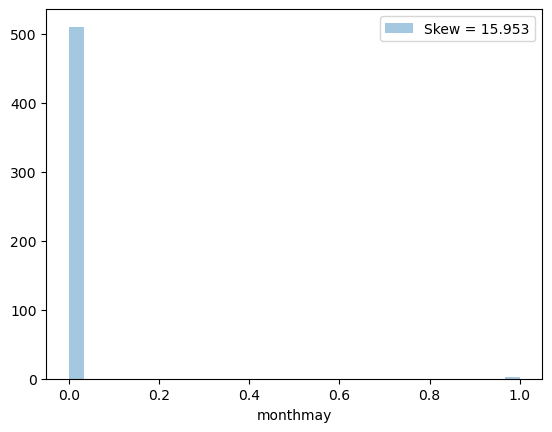

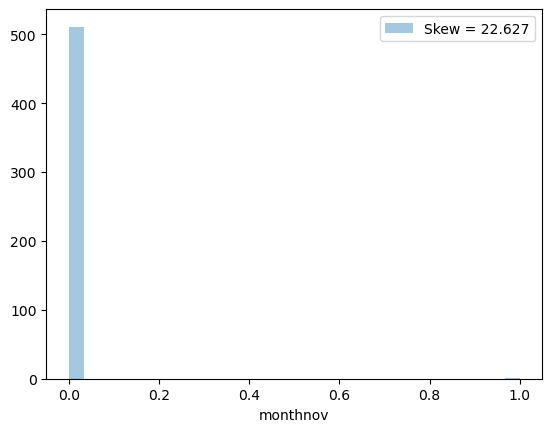

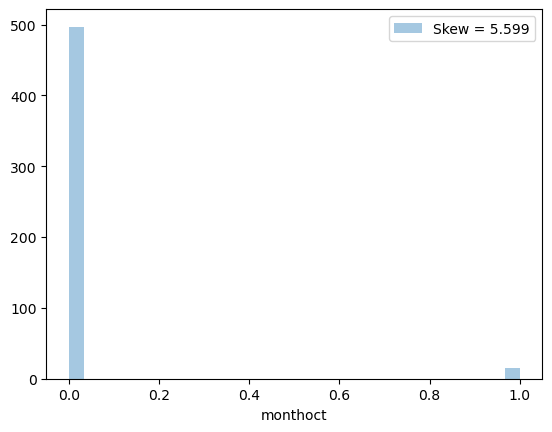

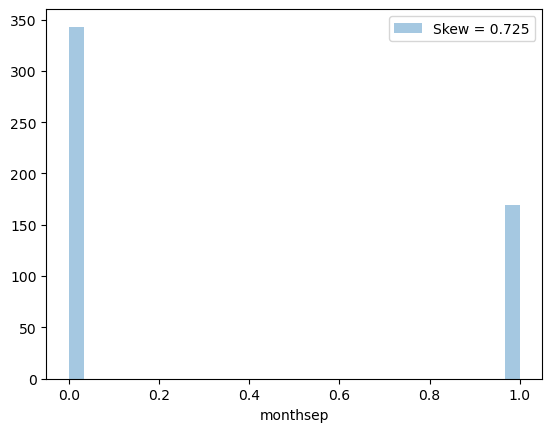

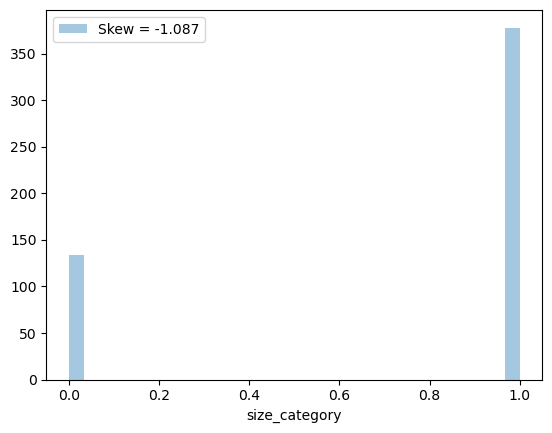

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [23]:
x=df.drop(["area"],axis=1).values
y=df["area"].values

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [25]:
x

array([[-8.00337889e-01, -1.31662324e+00, -1.82078462e+00, ...,
        -1.73727046e-01, -7.01934021e-01,  5.95396804e-01],
       [-5.67915730e-03, -1.17309111e+00,  4.90600375e-01, ...,
         5.75615612e+00, -7.01934021e-01,  5.95396804e-01],
       [-5.67915730e-03, -1.04360018e+00,  5.62177712e-01, ...,
         5.75615612e+00, -7.01934021e-01,  5.95396804e-01],
       ...,
       [-1.63111747e+00, -8.40783046e-01,  4.76526180e-01, ...,
        -1.73727046e-01, -7.01934021e-01, -1.67955218e+00],
       [ 6.80617020e-01,  5.52414627e-01,  2.71847167e-01, ...,
        -1.73727046e-01, -7.01934021e-01,  5.95396804e-01],
       [-2.01038641e+00, -1.67857381e+00, -1.77092176e+00, ...,
        -1.73727046e-01, -7.01934021e-01,  5.95396804e-01]])

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [28]:
from tensorflow.keras.layers import Dense
from scipy.stats.morestats import optimize
ann=Sequential()
ann.add(Dense(units=30,activation="relu"))
ann.add(Dense(units=30,activation="relu"))
ann.add(Dense(units=30,activation="relu"))
ann.add(Dense(units=1))
ann.compile(optimizer="adam", loss="mse")


In [29]:
ann.fit(xtrain,ytrain,epochs=200,validation_data=[xtrain,ytrain],callbacks=[early_stop])

Epoch 1/200
12/12 [==============================] - 2s 39ms/step - loss: 580.6422 - val_loss: 576.0821
Epoch 2/200
12/12 [==============================] - 0s 9ms/step - loss: 572.9273 - val_loss: 566.1463
Epoch 3/200
12/12 [==============================] - 0s 11ms/step - loss: 561.3896 - val_loss: 553.6525
Epoch 4/200
12/12 [==============================] - 0s 13ms/step - loss: 547.5748 - val_loss: 537.6556
Epoch 5/200
12/12 [==============================] - 0s 10ms/step - loss: 529.8208 - val_loss: 519.3557
Epoch 6/200
12/12 [==============================] - 0s 9ms/step - loss: 512.0688 - val_loss: 499.5060
Epoch 7/200
12/12 [==============================] - 0s 10ms/step - loss: 491.5398 - val_loss: 484.0274
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 478.0066 - val_loss: 465.9131
Epoch 9/200
12/12 [==============================] - 0s 9ms/step - loss: 460.7755 - val_loss: 449.4790
Epoch 10/200
12/12 [==============================] - 0s 9ms/step - 

12/12 [==============================] - 0s 8ms/step - loss: 106.6732 - val_loss: 102.3959
Epoch 80/200
12/12 [==============================] - 0s 7ms/step - loss: 104.0253 - val_loss: 100.2769
Epoch 81/200
12/12 [==============================] - 0s 7ms/step - loss: 100.8658 - val_loss: 97.6844
Epoch 82/200
12/12 [==============================] - 0s 8ms/step - loss: 100.7037 - val_loss: 96.0075
Epoch 83/200
12/12 [==============================] - 0s 8ms/step - loss: 99.5811 - val_loss: 93.9417
Epoch 84/200
12/12 [==============================] - 0s 8ms/step - loss: 95.0913 - val_loss: 91.8319
Epoch 85/200
12/12 [==============================] - 0s 15ms/step - loss: 99.6802 - val_loss: 90.5331
Epoch 86/200
12/12 [==============================] - 0s 8ms/step - loss: 89.5758 - val_loss: 100.1777
Epoch 87/200
12/12 [==============================] - 0s 8ms/step - loss: 101.6175 - val_loss: 90.1830
Epoch 88/200
12/12 [==============================] - 0s 8ms/step - loss: 92.7606 - va

12/12 [==============================] - 0s 8ms/step - loss: 20.4914 - val_loss: 19.3734
Epoch 159/200
12/12 [==============================] - 0s 8ms/step - loss: 20.4076 - val_loss: 19.0084
Epoch 160/200
12/12 [==============================] - 0s 9ms/step - loss: 20.8728 - val_loss: 18.8373
Epoch 161/200
12/12 [==============================] - 0s 8ms/step - loss: 19.3338 - val_loss: 18.6473
Epoch 162/200
12/12 [==============================] - 0s 9ms/step - loss: 19.0101 - val_loss: 18.1847
Epoch 163/200
12/12 [==============================] - 0s 9ms/step - loss: 19.2683 - val_loss: 18.0508
Epoch 164/200
12/12 [==============================] - 0s 9ms/step - loss: 19.0659 - val_loss: 17.8127
Epoch 165/200
12/12 [==============================] - 0s 9ms/step - loss: 20.6937 - val_loss: 17.6104
Epoch 166/200
12/12 [==============================] - 0s 8ms/step - loss: 20.8452 - val_loss: 20.9608
Epoch 167/200
12/12 [==============================] - 0s 8ms/step - loss: 22.5755 - va

In [30]:
loss_df=pd.DataFrame(ann.history.history)
loss_df.head()

,loss,val_loss
0,580.642151,576.082092
1,572.927307,566.146301
2,561.389648,553.652466
3,547.574829,537.655640
4,529.820801,519.355652


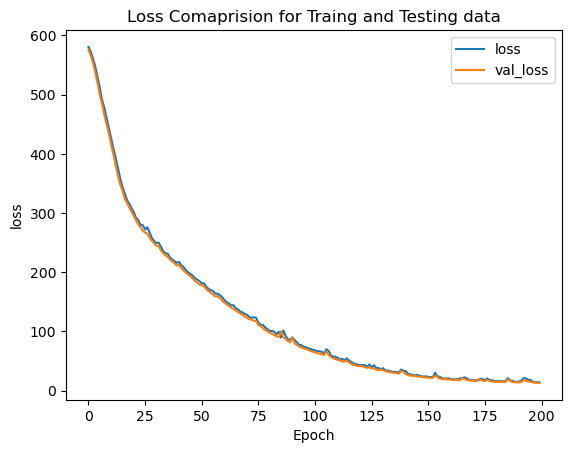

In [31]:
loss_df[['loss','val_loss']].plot()
plt.title('Loss Comaprision for Traing and Testing data')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [32]:
ypred=ann.predict(xtest)
ypred[:5]

5/5 [==============================] - 0s 3ms/step


array([[ 0.9127322],
       [ 1.1675451],
       [ 0.7938407],
       [25.18788  ],
       [ 1.0957911]], dtype=float32)

In [33]:
predict=pd.DataFrame({'Actual_Value':ytest,'Pred_Value':ypred.flatten()})
predict.head()

,Actual_Value,Pred_Value
0,0.00,0.912732
1,0.00,1.167545
2,0.00,0.793841
3,35.88,25.187880
4,0.00,1.095791


In [34]:
from sklearn.metrics import r2_score
print(f'R2_score of model is {r2_score(ytest,ypred)}')

R2_score of model is -0.5757778700660263
